<a href="https://colab.research.google.com/github/captain7oxic/MNIST_Classification/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout,Activation
from keras.utils import np_utils

#data

from keras.datasets import mnist

np.random.seed(34)


In [0]:
#loading data

(X_train,y_train),(X_test,y_test) = mnist.load_data()



In [0]:
print("Original Shape of training set: X:{} , Y:{}".format(X_train.shape,y_train.shape))
print("Original Shape of test set: X:{} , Y:{}".format(X_test.shape,y_test.shape))

Original Shape of training set: X:(60000, 28, 28) , Y:(60000,)
Original Shape of test set: X:(10000, 28, 28) , Y:(10000,)


Text(0.5, 1.0, '0')

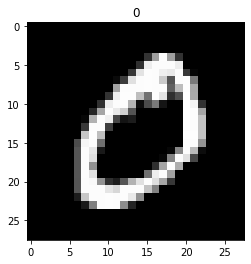

In [0]:
plt.imshow(X_train[1],cmap="gray")
plt.title(y_train[1])

In [0]:
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)


In [0]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")


X_train/=255
X_test/=255

In [0]:
X_train[0],X_test[0]

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [0]:
number_of_classes = 10

Y_train = np_utils.to_categorical(y_train,number_of_classes)
Y_test = np_utils.to_categorical(y_test,number_of_classes)

Y_train[1],Y_test[1]

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32))

In [0]:
#modelling

model = Sequential()

model.add(Dense(512,input_dim=784))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [0]:
model.compile(loss = "categorical_crossentropy",optimizer = "adam",metrics = ["accuracy"])

In [0]:
#validation-set creation 
size = int(len(X_train)*0.8)

train_x, val_x = X_train[:size],X_train[size:]
train_y,val_y = Y_train[:size],Y_train[size:]


In [0]:
model.fit(train_x,train_y,batch_size= 128,nb_epoch= 5,validation_data = (val_x,val_y))
#batch-size : number of training examples evaluted before fitting into model.
#epoch: number of complete passes through training datasets


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 48us/step - loss: 0.2845 - accuracy: 0.9136 - val_loss: 0.1295 - val_accuracy: 0.9609
Epoch 2/5
48000/48000 [==============================] - 2s 44us/step - loss: 0.1167 - accuracy: 0.9643 - val_loss: 0.1069 - val_accuracy: 0.9690
Epoch 3/5
48000/48000 [==============================] - 2s 44us/step - loss: 0.0857 - accuracy: 0.9741 - val_loss: 0.0927 - val_accuracy: 0.9732
Epoch 4/5
48000/48000 [==============================] - 2s 43us/step - loss: 0.0690 - accuracy: 0.9781 - val_loss: 0.0907 - val_accuracy: 0.9737
Epoch 5/5
48000/48000 [==============================] - 2s 42us/step - loss: 0.0585 - accuracy: 0.9815 - val_loss: 0.0841 - val_accuracy: 0.9767


In [0]:
score  = model.evaluate(X_test,Y_test)

10000/10000 [==============================] - 1s 70us/step


In [0]:
print("Test accuracy {}".format(score[1]))

Test accuracy 0.977400004863739


In [0]:
predictions = model.predict_classes(X_test)

In [0]:
predictions = list(predictions)
actuals = list(y_test)

In [0]:
sub = pd.DataFrame({"ImageId":actuals,"Label":predictions})


In [0]:

sub

,ImageId,Label
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
...,...,...
9995,2,2
9996,3,3
9997,4,4
9998,5,5


In [0]:
sub.to_csv("Output.csv",index=False)